### 패혈증(Sepsis) 생존/사망 여부 예측 모델
- ~~~~.csv
- 피쳐: 3개 (환자 나이, 환자 성별, 환자의 패혈증 발병 횟수)
- 타겟: 9일 후 사망/생존 여부
- 학습: 지도학습 >> 분류 >> 2진 분류
- 알고리즘: DNN ()
- 프레임워크: pytorch


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# DATA_PATH = r'C:\Users\KDP-43\Desktop\@DL_project\data\s41598-020-73558-3_sepsis_survival_primary_cohort.csv'
DATA_PATH = r'./data/s41598-020-73558-3_sepsis_survival_study_cohort.csv'

rawDF = pd.read_csv(DATA_PATH)
rawDF.head(3)

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,7,1,1,1
1,17,0,2,1
2,70,0,1,1


In [3]:
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19051 entries, 0 to 19050
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age_years                      19051 non-null  int64
 1   sex_0male_1female              19051 non-null  int64
 2   episode_number                 19051 non-null  int64
 3   hospital_outcome_1alive_0dead  19051 non-null  int64
dtypes: int64(4)
memory usage: 595.5 KB


##### 생존/사망 비율 

In [4]:
rawDF[rawDF.columns[-1]].value_counts()

hospital_outcome_1alive_0dead
1    15445
0     3606
Name: count, dtype: int64

In [5]:
rawDF[rawDF.columns[-1]].value_counts() *(100/len(rawDF))

hospital_outcome_1alive_0dead
1    81.07186
0    18.92814
Name: count, dtype: float64

<hr>
- 사망: 8105명 (19%) / 생존: 102099명 (81%)
	* => 엄청난 불균형 데이터
	<hr>

##### 패혈증 발병 횟수 distribution

In [6]:
rawDF['episode_number'].value_counts()

episode_number
1    14042
2     3304
3     1067
4      441
5      197
Name: count, dtype: int64

(array([14042.,  3304.,  1067.,   441.,   197.,     0.]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

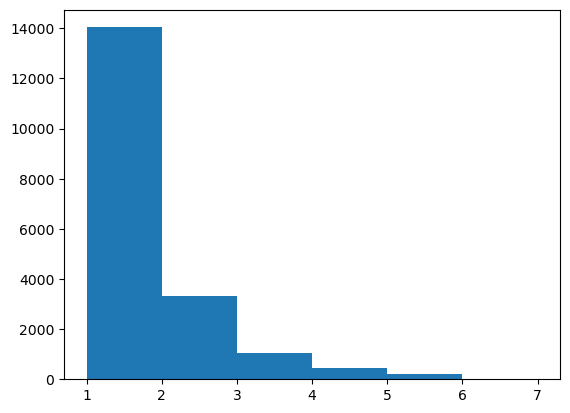

In [7]:
x_range = range(1,8)
plt.hist(rawDF[rawDF.columns[2]], bins=x_range)
# plt.show()

#### 환자 나이 distribution

In [8]:
rawDF[rawDF.columns[0]].value_counts()

age_years
84    673
83    643
82    639
85    625
86    624
     ... 
14     15
13     15
10     13
7      13
4      11
Name: count, Length: 101, dtype: int64

(array([ 319.,  220.,  298.,  364.,  692., 1459., 3097., 4127., 6113.,
        2362.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

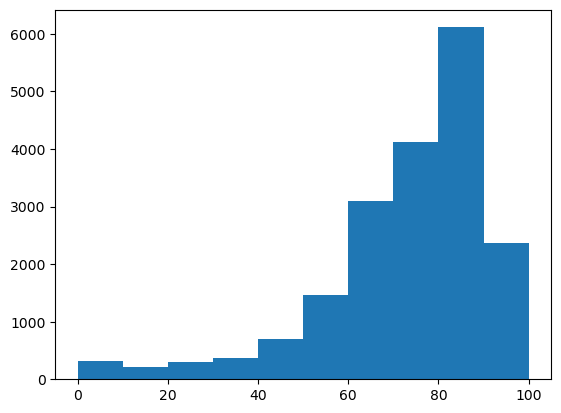

In [9]:
plt.hist(rawDF[rawDF.columns[0]])

##### 사망자 나이 분포

Text(0.5, 1.0, 'ALIVE PEOPLE AGE')

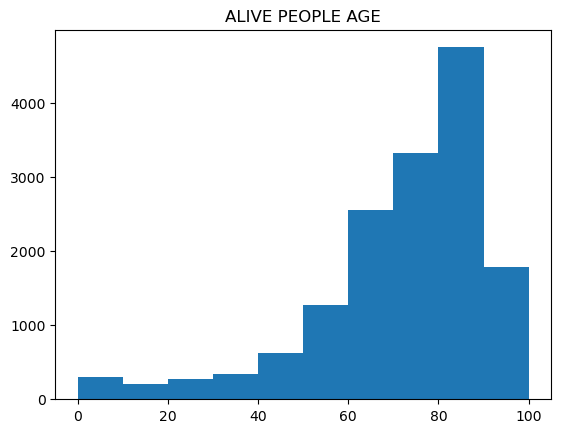

In [10]:
deadDF = rawDF.groupby('hospital_outcome_1alive_0dead').get_group(0)
aliveDF = rawDF.groupby('hospital_outcome_1alive_0dead').get_group(1)

plt.hist(aliveDF[aliveDF.columns[0]])
plt.title("ALIVE PEOPLE AGE")

##### 사망자 나이 분포

Text(0.5, 1.0, 'Dead People AGE')

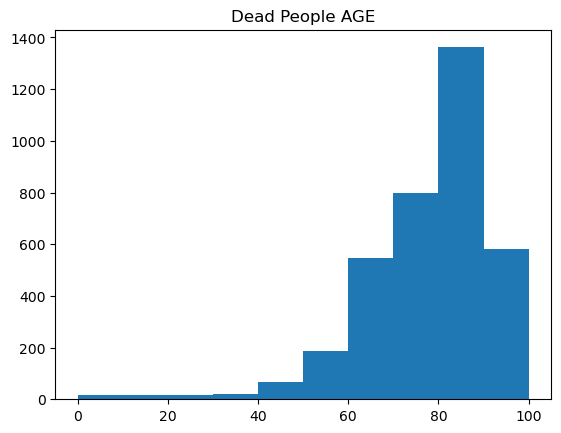

In [11]:
plt.hist(deadDF[deadDF.columns[0]])
plt.title("Dead People AGE")

- 생존자 그룹 & 사망자 그룹 나이 분포 왼쪽으로 꼬리가 긴 분포
- 			=> 정규화 필요한가?? 	=> 질문!!

#### 패혈증 발병 횟수 

##### 사망자 그룹 패혈증 발병 횟수 분포

Text(0.5, 1.0, 'DEAD PEOPLE Sepsis history')

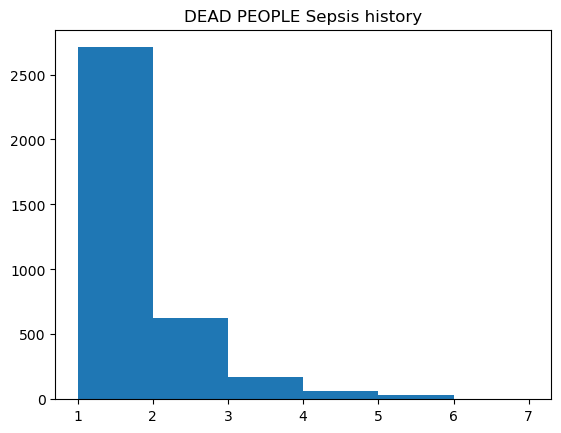

In [12]:
x_range = range(1,8)
plt.hist(deadDF[deadDF.columns[2]], bins=x_range)
plt.title("DEAD PEOPLE Sepsis history")

##### 생존자 그룹 패혈증 발병 횟수 분포

Text(0.5, 1.0, 'Alive PEOPLE Sepsis history')

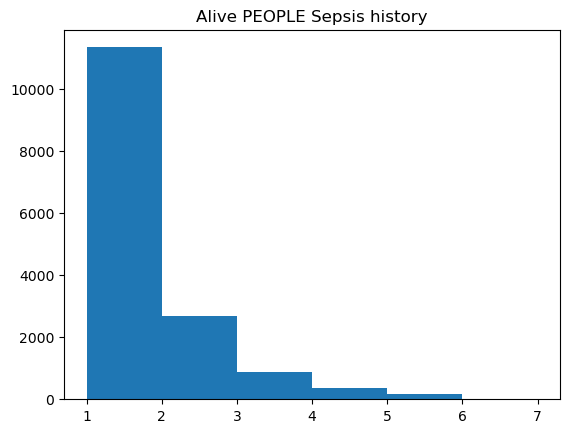

In [13]:
x_range = range(1,8)
plt.hist(aliveDF[aliveDF.columns[2]], bins=x_range)
plt.title("Alive PEOPLE Sepsis history")

#### 성별 분포
- 0: male, 1: female

In [14]:
rawDF[rawDF.columns[1]].value_counts()

sex_0male_1female
0    10505
1     8546
Name: count, dtype: int64

##### 생존자 그룹 성별 비율

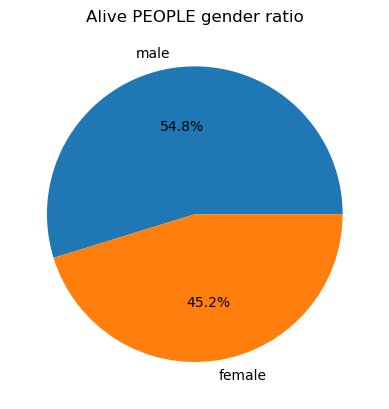

In [15]:
plt.pie(aliveDF[aliveDF.columns[1]].value_counts(), labels=['male','female'], autopct='%.1f%%')
plt.title("Alive PEOPLE gender ratio")
plt.show()

##### 사망자 그룹 성별 비율

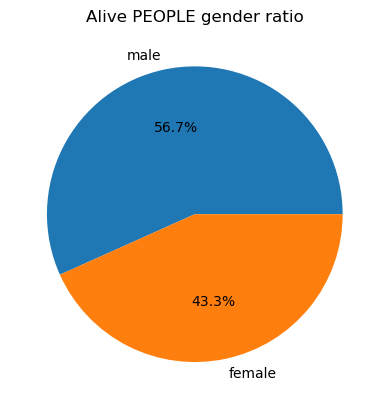

In [16]:
plt.pie(deadDF[deadDF.columns[1]].value_counts(), labels=['male','female'], autopct='%.1f%%')
plt.title("Alive PEOPLE gender ratio")
plt.show()